In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
# Setting the working directory
import os
os.chdir('/Users/vishalraj/GitHub/Flight_Fare_Prediction')

In [3]:
from src.data.make_dataset import load_and_save_data_by_folder

path = 'data/raw'

# Load and save concatenated data by folder
load_and_save_data_by_folder(path)

In [3]:
import pandas as pd
df = pd.read_csv("data/interim/ATL/ATL_concatenated.csv")
print(df.head())

                              legId  searchDate  flightDate startingAirport  \
0  ee4aaff43c557e1704ebf52b8abf25ad  2022-05-13  2022-06-15             ATL   
1  284bffb121ffdafba55f69d6d89a4b7d  2022-05-13  2022-06-15             ATL   
2  8efdd07b82644146d45978f61d081f3b  2022-05-13  2022-06-15             ATL   
3  e03c8964b4feb4e206636a9c5c0015b2  2022-05-13  2022-06-15             ATL   
4  f44658d6761962cecc3eabc0a29d6ef9  2022-05-13  2022-06-15             ATL   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                BOS        PT8H51M           False         False      False   
1                BOS       PT12H31M           False         False      False   
2                BOS        PT4H35M           False         False      False   
3                BOS        PT4H38M           False         False      False   
4                BOS        PT6H43M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochS

In [3]:
# Extract dtypes
dtype_dict = df.dtypes.to_dict()

print(dtype_dict)

{'legId': dtype('O'), 'searchDate': dtype('O'), 'flightDate': dtype('O'), 'startingAirport': dtype('O'), 'destinationAirport': dtype('O'), 'travelDuration': dtype('O'), 'isBasicEconomy': dtype('bool'), 'isRefundable': dtype('bool'), 'isNonStop': dtype('bool'), 'totalFare': dtype('float64'), 'totalTravelDistance': dtype('float64'), 'segmentsDepartureTimeEpochSeconds': dtype('O'), 'segmentsDepartureTimeRaw': dtype('O'), 'segmentsArrivalTimeEpochSeconds': dtype('O'), 'segmentsArrivalTimeRaw': dtype('O'), 'segmentsArrivalAirportCode': dtype('O'), 'segmentsDepartureAirportCode': dtype('O'), 'segmentsAirlineName': dtype('O'), 'segmentsAirlineCode': dtype('O'), 'segmentsEquipmentDescription': dtype('O'), 'segmentsDurationInSeconds': dtype('O'), 'segmentsDistance': dtype('O'), 'segmentsCabinCode': dtype('O')}


In [5]:
from src.data.data_preprocessor import DataPreprocessor

# Create an instance of the DataPreprocessor class
preprocessor = DataPreprocessor()

# Merge all datasets
preprocessor.merge_all_datasets()

# Take a 25% random sample of the merged dataset
sampled_data = preprocessor.data.sample(frac=0.25).reset_index(drop=True)

# Save the sampled dataset to a CSV file
sampled_data.to_csv('sampled_data.csv', index=False)

In [3]:
from src.data.data_preprocessor import DataPreprocessor

# Create an instance of the DataPreprocessor class
preprocessor = DataPreprocessor()

# Process all folders
preprocessor.merge_and_preprocess_all_datasets()

print("Checking unique values for 'startingAirport' after preprocessing:")
print(preprocessor.data['startingAirport'].unique())

print("\nCategory Mappings:")
print(preprocessor.category_mappings)

Data before explosion:
                              legId  searchDate  flightDate startingAirport  \
0  e1b137527b9175d7d930c3af82e70ae0  2022-04-19  2022-05-20             OAK   
1  d813ebd107e3fa700206c0d96015da7a  2022-04-19  2022-05-20             OAK   
2  e8ece5ad6f5962c696e06e031fc2a24a  2022-04-19  2022-05-20             OAK   
3  c004a54681335100f326c9613b3c9448  2022-04-19  2022-05-20             OAK   
4  4a42bbf77211b4afa7b9e14005949120  2022-04-19  2022-05-20             OAK   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL        PT7H52M           False         False      False   
1                ATL        PT6H15M           False         False      False   
2                ATL         PT9H6M           False         False      False   
3                ATL        PT6H17M           False         False      False   
4                ATL       PT14H12M           False         False      False   

   totalFare  ...  se

In [5]:
import pandas as pd
df1 = pd.read_csv("data/processed/merged_data_processed_dl.csv")
print(df1.head(20))
print(len(df1))

    totalTravelDistance  segmentsDurationInSeconds  segmentsDistance  \
0              0.276832                   0.031077          0.168055   
1              0.276832                   0.031077          0.606980   
2              0.276832                   0.360661          0.168055   
3              0.276832                   0.360661          0.606980   
4              0.276832                   0.031077          0.168055   
5              0.276832                   0.031077          0.606980   
6              0.276832                   0.360661          0.168055   
7              0.276832                   0.360661          0.606980   
8             -0.015351                  -0.943940         -0.282508   
9             -0.015351                   1.500470         -0.282508   
10            -0.015351                  -0.943940         -0.282508   
11            -0.015351                   1.500470         -0.282508   
12            -0.015351                  -0.943940         -0.28

In [9]:
unique_values = df1['destinationAirport'].unique()
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [2]:
from src.models.train_model_vishal_raj import WideDeepModel

# Create an instance of FlightFareModel and load data
flight_fare_model = WideDeepModel()

# Compute embedding sizes
flight_fare_model.compute_embedding_sizes()

# Build and compile the model
flight_fare_model.build_model()
flight_fare_model.compile_model()

# Train the model
history = flight_fare_model.train_model(epochs=50)

# Evaluate the model
rmse, mae = flight_fare_model.evaluate(batch_size=32768)

print(f"RMSE on test set: {rmse}")
print(f"MAE on test set: {mae}")

2023-11-08 02:50:42.252850: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-08 02:50:42.252883: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-08 02:50:42.252894: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-08 02:50:42.253099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-08 02:50:42.253453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-11-08 02:50:52.474471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-08 02:50:52.522159: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


920/920 [==============================] - ETA: 0s - loss: 47027.5977 - mae: 147.5284 - mse: 47027.5977INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 114s 118ms/step - loss: 47027.5977 - mae: 147.5284 - mse: 47027.5977 - val_loss: 39202.0234 - val_mae: 133.8757 - val_mse: 39202.0234 - lr: 0.0050
Epoch 2/50
920/920 [==============================] - ETA: 0s - loss: 39304.0547 - mae: 133.9391 - mse: 39304.0547INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 104s 113ms/step - loss: 39304.0547 - mae: 133.9391 - mse: 39304.0547 - val_loss: 38598.4336 - val_mae: 132.7781 - val_mse: 38598.4336 - lr: 0.0050
Epoch 3/50
920/920 [==============================] - 104s 113ms/step - loss: 38125.7539 - mae: 132.8181 - mse: 38125.7539 - val_loss: 48817.8398 - val_mae: 158.2812 - val_mse: 48817.8398 - lr: 0.0100
Epoch 4/50
920/920 [==============================] - ETA: 0s - loss: 37914.7070 - mae: 133.3727 - mse: 37914.7070INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 105s 114ms/step - loss: 37914.7070 - mae: 133.3727 - mse: 37914.7070 - val_loss: 36116.0117 - val_mae: 130.9592 - val_mse: 36116.0117 - lr: 0.0100
Epoch 5/50
920/920 [==============================] - 104s 113ms/step - loss: 36429.1992 - mae: 131.7739 - mse: 36429.1992 - val_loss: 44142.0352 - val_mae: 150.8190 - val_mse: 44142.0352 - lr: 0.0100
Epoch 6/50
920/920 [==============================] - ETA: 0s - loss: 36224.7734 - mae: 131.6151 - mse: 36224.7734INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 104s 113ms/step - loss: 36224.7734 - mae: 131.6151 - mse: 36224.7734 - val_loss: 35732.8320 - val_mae: 130.4830 - val_mse: 35732.8320 - lr: 0.0100
Epoch 7/50
920/920 [==============================] - 105s 114ms/step - loss: 36221.3711 - mae: 131.5974 - mse: 36221.3711 - val_loss: 37291.6445 - val_mae: 134.3606 - val_mse: 37291.6445 - lr: 0.0100
Epoch 8/50
920/920 [==============================] - ETA: 0s - loss: 36093.8516 - mae: 131.2011 - mse: 36093.8516INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 105s 114ms/step - loss: 36093.8516 - mae: 131.2011 - mse: 36093.8516 - val_loss: 35296.7734 - val_mae: 129.4052 - val_mse: 35296.7734 - lr: 0.0100
Epoch 9/50
920/920 [==============================] - ETA: 0s - loss: 36429.2109 - mae: 131.8264 - mse: 36429.2109INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 105s 114ms/step - loss: 36429.2109 - mae: 131.8264 - mse: 36429.2109 - val_loss: 35245.5039 - val_mae: 128.5719 - val_mse: 35245.5039 - lr: 0.0100
Epoch 10/50
920/920 [==============================] - 105s 114ms/step - loss: 36120.2500 - mae: 131.1089 - mse: 36120.2500 - val_loss: 35538.5938 - val_mae: 130.2521 - val_mse: 35538.5938 - lr: 0.0100
Epoch 11/50
920/920 [==============================] - ETA: 0s - loss: 36013.4453 - mae: 130.8271 - mse: 36013.4453INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


920/920 [==============================] - 105s 114ms/step - loss: 36013.4453 - mae: 130.8271 - mse: 36013.4453 - val_loss: 35111.3125 - val_mae: 128.9933 - val_mse: 35111.3125 - lr: 0.0100
Epoch 12/50
920/920 [==============================] - 104s 112ms/step - loss: 36168.4180 - mae: 131.1382 - mse: 36168.4180 - val_loss: 35296.5547 - val_mae: 130.2089 - val_mse: 35296.5547 - lr: 0.0100
Epoch 13/50
920/920 [==============================] - 105s 114ms/step - loss: 36382.5820 - mae: 131.3895 - mse: 36382.5820 - val_loss: 35483.2617 - val_mae: 130.2029 - val_mse: 35483.2617 - lr: 0.0100
Epoch 14/50
198/198 [==============================] - 2s 7ms/step
RMSE on test set: 187.51583862304688
MAE on test set: 129.0518798828125


In [ ]:
# from src.models.train_model import WideDeepModel

# # Create an instance of FlightFareModel and load data
# flight_fare_model = WideDeepModel()

# # Compute embedding sizes
# flight_fare_model.compute_embedding_sizes()

# # Hyperparameter tuning
# flight_fare_model.hyperparameter_tuning(epochs=10)

# # Train the model using the best hyperparameters
# flight_fare_model.train_model(epochs=10)  # or more epochs

# # Evaluate the model
# rmse, mae = flight_fare_model.evaluate(flight_fare_model.data)

# print(f"RMSE on test set: {rmse}")
# print(f"MAE on test set: {mae}")

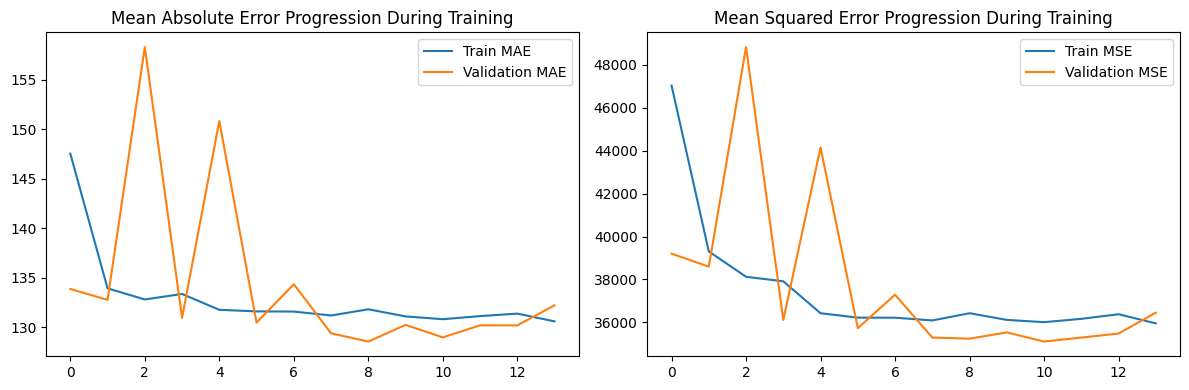

In [3]:
# Plot training history
import matplotlib.pyplot as plt

# Plot MAE and MSE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error Progression During Training')

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.legend()
plt.title('Mean Squared Error Progression During Training')

plt.tight_layout()
plt.show()